# Manejo de fechas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Ejemplo 1

In [2]:
df = pd.DataFrame({
    'name':[
        'john','lisa','peter','carl','linda','betty'
    ],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})
df

,name,date_of_birth
0,john,01/21/1988
1,lisa,03/10/1977
2,peter,07/25/1999
3,carl,01/22/1977
4,linda,09/30/1968
5,betty,09/15/1970


Convertir de cadena a datetime

In [3]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], infer_datetime_format=True)
df

,name,date_of_birth
0,john,1988-01-21
1,lisa,1977-03-10
2,peter,1999-07-25
3,carl,1977-01-22
4,linda,1968-09-30
5,betty,1970-09-15


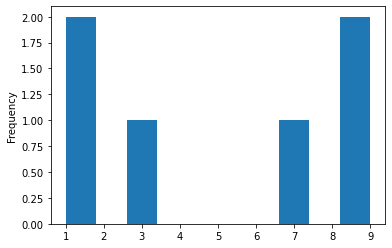

In [4]:
plt.clf()
df['date_of_birth'].map(lambda d: d.month).plot.hist()
plt.show()

## Ejemplo 2

In [6]:
from matplotlib.dates import date2num
import datetime as dt

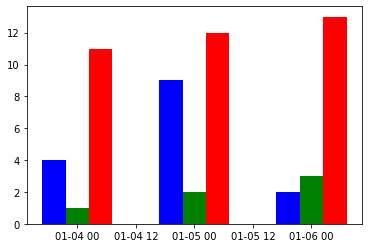

In [7]:
x = [
    dt.datetime(2021, 1, 4, 0, 0),
    dt.datetime(2021, 1, 5, 0, 0),
    dt.datetime(2021, 1, 6, 0, 0)
]
x = date2num(x)

y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')
ax.xaxis_date()

plt.show()

## Ejemplo 3

Ensamblando fechas desde multiples columnas

In [5]:
df = pd.DataFrame({'nombre': ["cesar", "juan"],
                'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
df['date'] = pd.to_datetime(df[["year","month","day"]]) # o  df[["year","month","day"]]
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


Obtener año, mes y dia

In [8]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])

df['year']= df['DoB'].dt.year
df['month']= df['DoB'].dt.month
df['day']= df['DoB'].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


Obtener semana del año, dia de la semana y año bisiesto

In [9]:
df['week_of_year'] = df['DoB'].dt.isocalendar().week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


Mapear el dia de la semana al nombre

In [10]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['day_of_week'].map(dw_mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


Obtener la edad desde la fecha de nacimiento

In [11]:
# Year difference
today = pd.to_datetime('today')
print(today)
diff_y = today.year - df['year']
diff_y

2022-06-08 09:39:59.775102


0    25
1    26
2    27
Name: year, dtype: int64

In [12]:
# Haven't had birthday
b_md = df['DoB'].apply(lambda x: (x.month, x.day) )
b_md

0      (8, 5)
1     (4, 28)
2    (12, 16)
Name: DoB, dtype: object

In [13]:
(today.month,today.day)

(6, 8)

In [18]:
"Hola" > "HoLa"

True

In [21]:
no_birthday = b_md > (today.month,today.day)
no_birthday

0     True
1    False
2     True
Name: DoB, dtype: bool

In [22]:
df['age'] = diff_y - no_birthday
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,24
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,26
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,26
